In [47]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import re

In [48]:
from wordcloud import WordCloud 

In [49]:
import nltk.sentiment.vader

In [50]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [51]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tobis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [52]:
sid = SentimentIntensityAnalyzer()

In [110]:
df = pd.read_csv('Ukraine_translated_final_en.csv')

In [111]:
df.head()

,Unnamed: 0,Date,Tweet,User,Location,tweet,tweet_without_stopwords,tweets_preprocessed
0,0,2022-02-28 19:15:53+00:00,b'@TWLadyGrey @Digenes_Akrites @maryteryan1 @L...,b'KingKon42861912',b'',My point was our resources should be spent…,My point resources spent…,my point resources spent
1,1,2022-02-28 19:15:53+00:00,b'@AndrewTait67 @OWS1892 @LabourList Facts:\n\...,b'GregClinker',b'',Facts:\n\n1) NATO renaged in its promise no...,"Facts: 1) NATO renaged promise expand ""an inch...",facts nato renaged promise expand an inch east
2,2,2022-02-28 19:15:53+00:00,b'@JustinTrudeau @UN @antonioguterres Ukraine ...,b'FahriSairr',b'T\xc3\xbcrkiye',Ukraine gives great casualties to Russia wi...,Ukraine gives great casualties Russia Bayrakta...,ukraine gives great casualties russia bayrakta...
3,3,2022-02-28 19:15:53+00:00,b'@CaxstonePKigata To annex Ukraine the way he...,b'JK02384736',b'',To annex Ukraine the way he annexed Crimea.\n...,To annex Ukraine way annexed Crimea. Maybe als...,to annex ukraine way annexed crimea maybe also...
4,4,2022-02-28 19:15:53+00:00,b'@RichardFerrand @AssembleeNat @jjbridey94260...,b'Ulyana28537426',b'',STOP RUSSIAN AGGRESSION AGAINST…,STOP RUSSIAN AGGRESSION AGAINST…,stop russian aggression against


In [112]:
df['time'] = pd.to_datetime(df['Date'])

In [113]:
df['date'] = df['time'].dt.date

In [114]:
df.head()

,Unnamed: 0,Date,Tweet,User,Location,tweet,tweet_without_stopwords,tweets_preprocessed,time,date
0,0,2022-02-28 19:15:53+00:00,b'@TWLadyGrey @Digenes_Akrites @maryteryan1 @L...,b'KingKon42861912',b'',My point was our resources should be spent…,My point resources spent…,my point resources spent,2022-02-28 19:15:53+00:00,2022-02-28
1,1,2022-02-28 19:15:53+00:00,b'@AndrewTait67 @OWS1892 @LabourList Facts:\n\...,b'GregClinker',b'',Facts:\n\n1) NATO renaged in its promise no...,"Facts: 1) NATO renaged promise expand ""an inch...",facts nato renaged promise expand an inch east,2022-02-28 19:15:53+00:00,2022-02-28
2,2,2022-02-28 19:15:53+00:00,b'@JustinTrudeau @UN @antonioguterres Ukraine ...,b'FahriSairr',b'T\xc3\xbcrkiye',Ukraine gives great casualties to Russia wi...,Ukraine gives great casualties Russia Bayrakta...,ukraine gives great casualties russia bayrakta...,2022-02-28 19:15:53+00:00,2022-02-28
3,3,2022-02-28 19:15:53+00:00,b'@CaxstonePKigata To annex Ukraine the way he...,b'JK02384736',b'',To annex Ukraine the way he annexed Crimea.\n...,To annex Ukraine way annexed Crimea. Maybe als...,to annex ukraine way annexed crimea maybe also...,2022-02-28 19:15:53+00:00,2022-02-28
4,4,2022-02-28 19:15:53+00:00,b'@RichardFerrand @AssembleeNat @jjbridey94260...,b'Ulyana28537426',b'',STOP RUSSIAN AGGRESSION AGAINST…,STOP RUSSIAN AGGRESSION AGAINST…,stop russian aggression against,2022-02-28 19:15:53+00:00,2022-02-28


In [115]:
df['weekday'] = df['time'].dt.dayofweek
df['Hour'] = df['time'].dt.hour
df['Minute'] = df['time'].dt.minute

In [116]:
df.columns

Index(['Unnamed: 0', 'Date', 'Tweet', 'User', 'Location', 'tweet',
       'tweet_without_stopwords', 'tweets_preprocessed', 'time', 'date',
       'weekday', 'Hour', 'Minute'],
      dtype='object')

In [117]:
df = df[['Date', 'User', 'Location',
       'time', 'weekday', 'Hour', 'Minute','tweets_preprocessed','date']]

In [118]:
df.columns = ['Date', 'User', 'Location', 'time', 'weekday', 'Hour', 'Minute',
       'tweet','date']

In [119]:
len(df)

26134

In [120]:
df.head()

,Date,User,Location,time,weekday,Hour,Minute,tweet,date
0,2022-02-28 19:15:53+00:00,b'KingKon42861912',b'',2022-02-28 19:15:53+00:00,0,19,15,my point resources spent,2022-02-28
1,2022-02-28 19:15:53+00:00,b'GregClinker',b'',2022-02-28 19:15:53+00:00,0,19,15,facts nato renaged promise expand an inch east,2022-02-28
2,2022-02-28 19:15:53+00:00,b'FahriSairr',b'T\xc3\xbcrkiye',2022-02-28 19:15:53+00:00,0,19,15,ukraine gives great casualties russia bayrakta...,2022-02-28
3,2022-02-28 19:15:53+00:00,b'JK02384736',b'',2022-02-28 19:15:53+00:00,0,19,15,to annex ukraine way annexed crimea maybe also...,2022-02-28
4,2022-02-28 19:15:53+00:00,b'Ulyana28537426',b'',2022-02-28 19:15:53+00:00,0,19,15,stop russian aggression against,2022-02-28


In [121]:
df['tweet'] = df['tweet'].astype(str)

In [122]:
df['scores'] = df['tweet'].apply(lambda tweet: sid.polarity_scores(tweet))

In [123]:
df.head()

,Date,User,Location,time,weekday,Hour,Minute,tweet,date,scores
0,2022-02-28 19:15:53+00:00,b'KingKon42861912',b'',2022-02-28 19:15:53+00:00,0,19,15,my point resources spent,2022-02-28,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,2022-02-28 19:15:53+00:00,b'GregClinker',b'',2022-02-28 19:15:53+00:00,0,19,15,facts nato renaged promise expand an inch east,2022-02-28,"{'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'comp..."
2,2022-02-28 19:15:53+00:00,b'FahriSairr',b'T\xc3\xbcrkiye',2022-02-28 19:15:53+00:00,0,19,15,ukraine gives great casualties russia bayrakta...,2022-02-28,"{'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'comp..."
3,2022-02-28 19:15:53+00:00,b'JK02384736',b'',2022-02-28 19:15:53+00:00,0,19,15,to annex ukraine way annexed crimea maybe also...,2022-02-28,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,2022-02-28 19:15:53+00:00,b'Ulyana28537426',b'',2022-02-28 19:15:53+00:00,0,19,15,stop russian aggression against,2022-02-28,"{'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'comp..."


In [124]:
df['compound'] = df['scores'].apply(lambda d: d['compound'])

In [125]:
df['com_score'] = df['compound'].apply(lambda score: 'pos' if score > 0 else ('neg' if score < 0 else 'neu'))

In [126]:
df.head(50)

,Date,User,Location,time,weekday,Hour,Minute,tweet,date,scores,compound,com_score
0,2022-02-28 19:15:53+00:00,b'KingKon42861912',b'',2022-02-28 19:15:53+00:00,0,19,15,my point resources spent,2022-02-28,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
1,2022-02-28 19:15:53+00:00,b'GregClinker',b'',2022-02-28 19:15:53+00:00,0,19,15,facts nato renaged promise expand an inch east,2022-02-28,"{'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'comp...",0.5574,pos
2,2022-02-28 19:15:53+00:00,b'FahriSairr',b'T\xc3\xbcrkiye',2022-02-28 19:15:53+00:00,0,19,15,ukraine gives great casualties russia bayrakta...,2022-02-28,"{'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'comp...",0.6249,pos
3,2022-02-28 19:15:53+00:00,b'JK02384736',b'',2022-02-28 19:15:53+00:00,0,19,15,to annex ukraine way annexed crimea maybe also...,2022-02-28,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
4,2022-02-28 19:15:53+00:00,b'Ulyana28537426',b'',2022-02-28 19:15:53+00:00,0,19,15,stop russian aggression against,2022-02-28,"{'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'comp...",-0.5267,neg
5,2022-02-28 19:15:53+00:00,b'HMartok',b'',2022-02-28 19:15:53+00:00,0,19,15,ukraine part nato,2022-02-28,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
6,2022-02-28 19:15:53+00:00,b'h1ghlanderYes',b'Inverness',2022-02-28 19:15:53+00:00,0,19,15,more proof russian lie dont bomb civilians its...,2022-02-28,"{'neg': 0.197, 'neu': 0.636, 'pos': 0.167, 'co...",-0.1210,neg
7,2022-02-28 19:15:53+00:00,b'IamVKBO',"b'Oslo, Norway'",2022-02-28 19:15:53+00:00,0,19,15,also the russian invasion ukraine the russoukr...,2022-02-28,"{'neg': 0.358, 'neu': 0.642, 'pos': 0.0, 'comp...",-0.5994,neg
8,2022-02-28 19:15:53+00:00,b'LTCPeterLerner',b'Israel',2022-02-28 19:15:53+00:00,0,19,15,pm conveys sorrow condolences death roman brod...,2022-02-28,"{'neg': 0.628, 'neu': 0.372, 'pos': 0.0, 'comp...",-0.9153,neg
9,2022-02-28 19:15:52+00:00,b'gospaddiction',b'United States',2022-02-28 19:15:52+00:00,0,19,15,maksim chmerkovskiy begins journey leave ukrai...,2022-02-28,"{'neg': 0.13, 'neu': 0.87, 'pos': 0.0, 'compou...",-0.0516,neg


In [127]:
from textblob import TextBlob

In [128]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [129]:
df['Subjectivity'] = df['tweet'].apply(getSubjectivity)

In [130]:
df['Polarity'] = df['tweet'].apply(getPolarity)

In [131]:
df.head()

,Date,User,Location,time,weekday,Hour,Minute,tweet,date,scores,compound,com_score,Subjectivity,Polarity
0,2022-02-28 19:15:53+00:00,b'KingKon42861912',b'',2022-02-28 19:15:53+00:00,0,19,15,my point resources spent,2022-02-28,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,0.10,-0.1
1,2022-02-28 19:15:53+00:00,b'GregClinker',b'',2022-02-28 19:15:53+00:00,0,19,15,facts nato renaged promise expand an inch east,2022-02-28,"{'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'comp...",0.5574,pos,0.00,0.0
2,2022-02-28 19:15:53+00:00,b'FahriSairr',b'T\xc3\xbcrkiye',2022-02-28 19:15:53+00:00,0,19,15,ukraine gives great casualties russia bayrakta...,2022-02-28,"{'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'comp...",0.6249,pos,0.75,0.8
3,2022-02-28 19:15:53+00:00,b'JK02384736',b'',2022-02-28 19:15:53+00:00,0,19,15,to annex ukraine way annexed crimea maybe also...,2022-02-28,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,0.00,0.0
4,2022-02-28 19:15:53+00:00,b'Ulyana28537426',b'',2022-02-28 19:15:53+00:00,0,19,15,stop russian aggression against,2022-02-28,"{'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'comp...",-0.5267,neg,0.00,0.0


In [132]:
# Plot WordCloud
allWords = ' '.join([twts for twts in df['tweet']])
wordCloud = WordCloud(width = 500, height =300, random_state = 21, max_font_size = 119).generate(allWords)

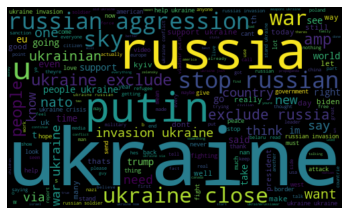

In [133]:
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [134]:
df['com_score'].value_counts()

neg    10573
pos     9146
neu     6415
Name: com_score, dtype: int64

In [135]:
df.head()

,Date,User,Location,time,weekday,Hour,Minute,tweet,date,scores,compound,com_score,Subjectivity,Polarity
0,2022-02-28 19:15:53+00:00,b'KingKon42861912',b'',2022-02-28 19:15:53+00:00,0,19,15,my point resources spent,2022-02-28,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,0.10,-0.1
1,2022-02-28 19:15:53+00:00,b'GregClinker',b'',2022-02-28 19:15:53+00:00,0,19,15,facts nato renaged promise expand an inch east,2022-02-28,"{'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'comp...",0.5574,pos,0.00,0.0
2,2022-02-28 19:15:53+00:00,b'FahriSairr',b'T\xc3\xbcrkiye',2022-02-28 19:15:53+00:00,0,19,15,ukraine gives great casualties russia bayrakta...,2022-02-28,"{'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'comp...",0.6249,pos,0.75,0.8
3,2022-02-28 19:15:53+00:00,b'JK02384736',b'',2022-02-28 19:15:53+00:00,0,19,15,to annex ukraine way annexed crimea maybe also...,2022-02-28,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,0.00,0.0
4,2022-02-28 19:15:53+00:00,b'Ulyana28537426',b'',2022-02-28 19:15:53+00:00,0,19,15,stop russian aggression against,2022-02-28,"{'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'comp...",-0.5267,neg,0.00,0.0


In [136]:
df.describe()

,weekday,Hour,Minute,compound,Subjectivity,Polarity
count,26134.0,26134.000000,26134.000000,26134.000000,26134.000000,26134.000000
mean,0.0,19.310783,15.914594,-0.045569,0.258140,0.041863
std,0.0,0.515174,11.741207,0.449357,0.315169,0.248134
min,0.0,18.000000,0.000000,-0.975800,0.000000,-1.000000
25%,0.0,19.000000,7.000000,-0.440400,0.000000,0.000000
50%,0.0,19.000000,14.000000,0.000000,0.075000,0.000000
75%,0.0,20.000000,24.000000,0.318200,0.500000,0.100000
max,0.0,20.000000,59.000000,0.960700,1.000000,1.000000


In [137]:
pd.pivot_table(df, index = 'date', values = 'compound')#, columns = 'col3')

,compound
date,
2022-02-28,-0.045569


In [138]:
df['value'] = 1

In [139]:
df_totalTweets = pd.pivot_table(df, index = 'com_score', values = 'value', aggfunc='count')#, columns = 'col3')

In [140]:
df_totalTweets

,value
com_score,
neg,10573
neu,6415
pos,9146


In [141]:
df_totalTweets.to_csv('df_totalTweets_Ukraine.csv')

In [142]:
df['Hour'] = df['Hour'].astype(int)

In [143]:
import datetime as dt

In [144]:
df.tail(50)

,Date,User,Location,time,weekday,Hour,Minute,tweet,date,scores,compound,com_score,Subjectivity,Polarity,value
26084,2022-02-28 20:18:32+00:00,b'Vanessa_Sarges',b'Toronto',2022-02-28 20:18:32+00:00,0,20,18,i proud speech represents canadian ambassador ...,2022-02-28,"{'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'comp...",0.4767,pos,0.750000,0.425000,1
26085,2022-02-28 20:18:32+00:00,b'mahmoudparsian',b'',2022-02-28 20:18:32+00:00,0,20,18,show murderers,2022-02-28,"{'neg': 0.811, 'neu': 0.189, 'pos': 0.0, 'comp...",-0.6486,neg,0.000000,0.000000,1
26086,2022-02-28 20:18:32+00:00,b'GudaDanilo',b'',2022-02-28 20:18:32+00:00,0,20,18,former miss ukraine joins fight against russia...,2022-02-28,"{'neg': 0.211, 'neu': 0.352, 'pos': 0.437, 'co...",0.6705,pos,0.450000,0.300000,1
26087,2022-02-28 20:18:32+00:00,b'DanielHyunChung',b'',2022-02-28 20:18:32+00:00,0,20,18,i shouldve mentioned usa needs mediator seems ...,2022-02-28,"{'neg': 0.094, 'neu': 0.738, 'pos': 0.168, 'co...",0.2732,pos,0.541667,-0.291667,1
26088,2022-02-28 20:18:32+00:00,b'JamesVGrimaldi',"b'Washington, DC'",2022-02-28 20:18:32+00:00,0,20,18,ukraine unplugs russian electric grid links eu...,2022-02-28,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,0.000000,0.000000,1
26089,2022-02-28 20:18:32+00:00,b'delilahgallo68',b'$mistressdelilah69',2022-02-28 20:18:32+00:00,0,20,18,of changed logo support ukraine meanwhile sit...,2022-02-28,"{'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'comp...",0.4019,pos,0.000000,0.000000,1
26090,2022-02-28 20:18:32+00:00,b'tradu81',"b'Australia, Melbourne'",2022-02-28 20:18:32+00:00,0,20,18,the media power brainwash people how come was,2022-02-28,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,0.000000,0.000000,1
26091,2022-02-28 20:18:32+00:00,b'InsightOnIslam',b'Makkah Al Mukarrama',2022-02-28 20:18:32+00:00,0,20,18,funny one willing fight russia directly comes ...,2022-02-28,"{'neg': 0.284, 'neu': 0.448, 'pos': 0.269, 'co...",-0.0772,neg,0.550000,0.040000,1
26092,2022-02-28 20:18:32+00:00,b'CynthiaHenthorn',"b'Washington, DC Metro Area'",2022-02-28 20:18:32+00:00,0,20,18,stand with ukraine mask bianca jean a portio...,2022-02-28,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,0.000000,0.000000,1
26093,2022-02-28 20:18:32+00:00,b'paultaylor59_',b'',2022-02-28 20:18:32+00:00,0,20,18,certain ukraine join west nato,2022-02-28,"{'neg': 0.0, 'neu': 0.411, 'pos': 0.589, 'comp...",0.5106,pos,0.571429,0.214286,1


In [145]:
#df['datetime'] = pd.to_datetime(df['datetime'], infer_datetime_format=True)

In [146]:
df['datetime'] = df['date'].astype(str) + ' '+ df['Hour'].astype(str)

In [147]:
df['datetime'] = df['datetime'].str.replace('\s(\d)$', ' 0\\1')

<ipython-input-147-757bad35e65a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['datetime'] = df['datetime'].str.replace('\s(\d)$', ' 0\\1')


In [148]:
df.head()

,Date,User,Location,time,weekday,Hour,Minute,tweet,date,scores,compound,com_score,Subjectivity,Polarity,value,datetime
0,2022-02-28 19:15:53+00:00,b'KingKon42861912',b'',2022-02-28 19:15:53+00:00,0,19,15,my point resources spent,2022-02-28,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,0.10,-0.1,1,2022-02-28 19
1,2022-02-28 19:15:53+00:00,b'GregClinker',b'',2022-02-28 19:15:53+00:00,0,19,15,facts nato renaged promise expand an inch east,2022-02-28,"{'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'comp...",0.5574,pos,0.00,0.0,1,2022-02-28 19
2,2022-02-28 19:15:53+00:00,b'FahriSairr',b'T\xc3\xbcrkiye',2022-02-28 19:15:53+00:00,0,19,15,ukraine gives great casualties russia bayrakta...,2022-02-28,"{'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'comp...",0.6249,pos,0.75,0.8,1,2022-02-28 19
3,2022-02-28 19:15:53+00:00,b'JK02384736',b'',2022-02-28 19:15:53+00:00,0,19,15,to annex ukraine way annexed crimea maybe also...,2022-02-28,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,0.00,0.0,1,2022-02-28 19
4,2022-02-28 19:15:53+00:00,b'Ulyana28537426',b'',2022-02-28 19:15:53+00:00,0,19,15,stop russian aggression against,2022-02-28,"{'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'comp...",-0.5267,neg,0.00,0.0,1,2022-02-28 19


In [149]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H')

In [150]:
df_datetime = pd.pivot_table(df, index = 'datetime', values = 'compound')#, columns = 'col3')

In [151]:
df_datetime.head(50)

,compound
datetime,
2022-02-28 18:00:00,-0.004140
2022-02-28 19:00:00,-0.050917
2022-02-28 20:00:00,-0.038576


In [152]:
df_day = pd.pivot_table(df, index = 'weekday', values = 'value', columns = 'com_score', aggfunc='count')

In [153]:
df_day.head(7)

com_score,neg,neu,pos
weekday,,,
0,10573,6415,9146


In [154]:
df_hour = pd.pivot_table(df, index = 'Hour', values = 'value', columns = 'com_score', aggfunc='count')

In [155]:
df_hour

com_score,neg,neu,pos
Hour,,,
18,237,170,262
19,6872,4066,5736
20,3464,2179,3148


In [156]:
df_hour.to_csv('df_hour_Ukraine.csv')

In [157]:
df.columns

Index(['Date', 'User', 'Location', 'time', 'weekday', 'Hour', 'Minute',
       'tweet', 'date', 'scores', 'compound', 'com_score', 'Subjectivity',
       'Polarity', 'value', 'datetime'],
      dtype='object')

In [158]:
df_sentiment = pd.pivot_table(df, index = 'datetime', values = 'value', columns = 'com_score', aggfunc='count')

In [159]:
df_sentiment.columns

Index(['neg', 'neu', 'pos'], dtype='object', name='com_score')

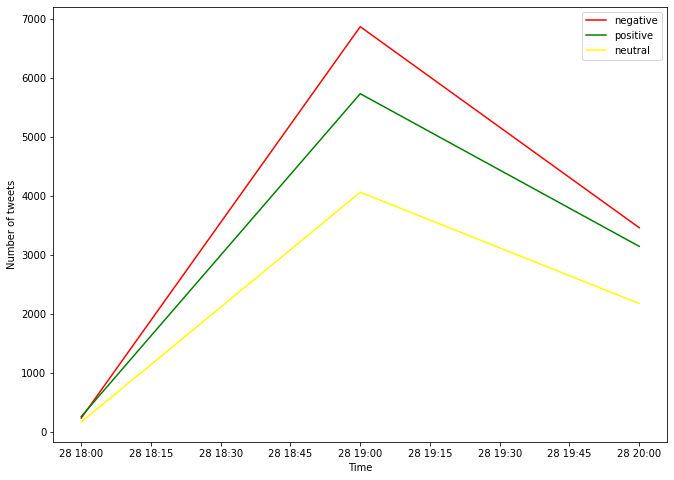

In [160]:
plt.figure(figsize=(11,8))
plt.xlabel("Time")
plt.ylabel('Number of tweets')
plt.gca().set_prop_cycle(color=['red', 'green', 'yellow'])
plt.plot(df_sentiment[['neg','pos','neu']])
plt.legend(['negative','positive','neutral'])

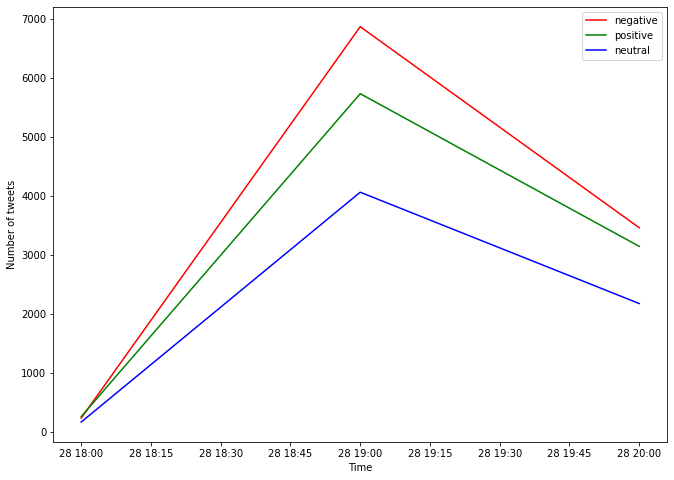

In [163]:
plt.figure(figsize=(11,8))
plt.xlabel("Time")
plt.ylabel('Number of tweets')
plt.gca().set_prop_cycle(color=['red', 'green','blue'])
plt.plot(df_sentiment[['neg','pos','neu']])
plt.legend(['negative','positive','neutral'])

In [164]:
df_sentiment.to_csv('df_sentiment_Ukraine.csv')

In [165]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [166]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [167]:
df.head()

,Date,User,Location,time,weekday,Hour,Minute,tweet,date,scores,compound,com_score,Subjectivity,Polarity,value,datetime
0,2022-02-28 19:15:53+00:00,b'KingKon42861912',b'',2022-02-28 19:15:53+00:00,0,19,15,my point resources spent,2022-02-28,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,0.10,-0.1,1,2022-02-28 19:00:00
1,2022-02-28 19:15:53+00:00,b'GregClinker',b'',2022-02-28 19:15:53+00:00,0,19,15,facts nato renaged promise expand an inch east,2022-02-28,"{'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'comp...",0.5574,pos,0.00,0.0,1,2022-02-28 19:00:00
2,2022-02-28 19:15:53+00:00,b'FahriSairr',b'T\xc3\xbcrkiye',2022-02-28 19:15:53+00:00,0,19,15,ukraine gives great casualties russia bayrakta...,2022-02-28,"{'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'comp...",0.6249,pos,0.75,0.8,1,2022-02-28 19:00:00
3,2022-02-28 19:15:53+00:00,b'JK02384736',b'',2022-02-28 19:15:53+00:00,0,19,15,to annex ukraine way annexed crimea maybe also...,2022-02-28,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,0.00,0.0,1,2022-02-28 19:00:00
4,2022-02-28 19:15:53+00:00,b'Ulyana28537426',b'',2022-02-28 19:15:53+00:00,0,19,15,stop russian aggression against,2022-02-28,"{'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'comp...",-0.5267,neg,0.00,0.0,1,2022-02-28 19:00:00


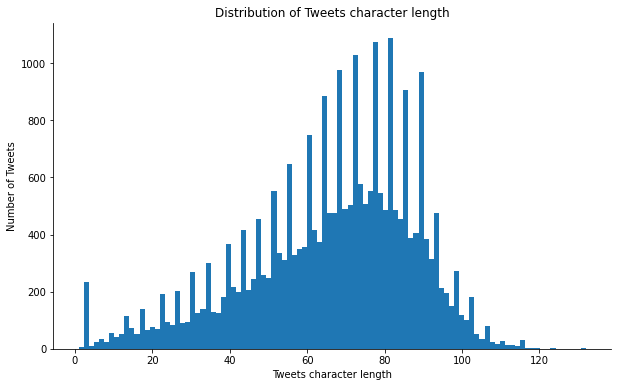

In [180]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in df.tweet]
plt.hist(doc_lens, bins = 100)
plt.title('Distribution of Tweets character length')
plt.ylabel('Number of Tweets')
plt.xlabel('Tweets character length')
sns.despine();

In [181]:
df_pos = df.loc[(df['com_score'] == 'pos')]

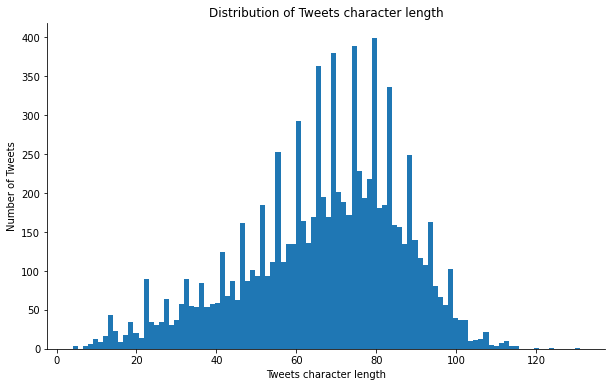

In [182]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in df_pos.tweet]
plt.hist(doc_lens, bins = 100)
plt.title('Distribution of Tweets character length')
plt.ylabel('Number of Tweets')
plt.xlabel('Tweets character length')
sns.despine();

In [183]:
df_neg = df.loc[(df['com_score'] == 'neg')]

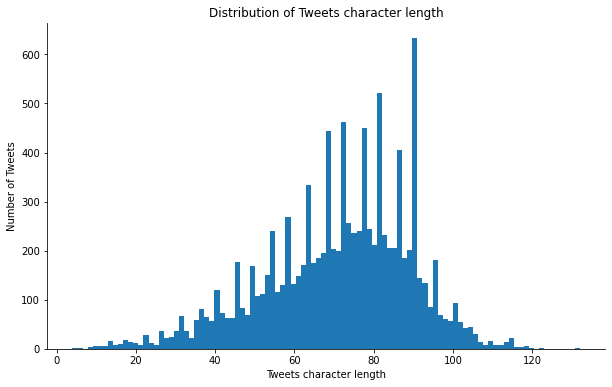

In [184]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in df_neg.tweet]
plt.hist(doc_lens, bins = 100)
plt.title('Distribution of Tweets character length')
plt.ylabel('Number of Tweets')
plt.xlabel('Tweets character length')
sns.despine();

In [185]:
df_neu = df.loc[(df['com_score'] == 'neu')]

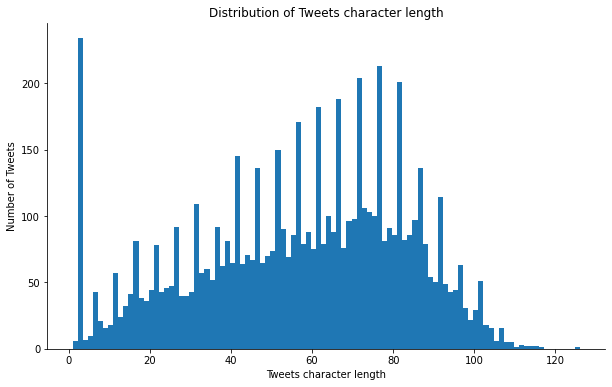

In [186]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in df_neu.tweet]
plt.hist(doc_lens, bins = 100)
plt.title('Distribution of Tweets character length')
plt.ylabel('Number of Tweets')
plt.xlabel('Tweets character length')
sns.despine();

In [222]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df.tweet, 15)
unigram = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

In [223]:
unigram

,unigram,count
0,ukraine,18516
1,russia,4126
2,russian,3396
3,war,2152
4,putin,2049
5,people,1618
6,stop,1354
7,invasion,1062
8,aggression,1056
9,close,1035


In [217]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3,3),stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df.tweet, 20)
trigram = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

In [218]:
trigram

,trigram,count
0,stop russian aggression,942
1,russian aggression ukraine,940
2,close sky ukraine,899
3,aggression ukraine close,891
4,ukraine close sky,875
5,sky ukraine exclude,772
6,ukraine exclude russia,651
7,russian invasion ukraine,145
8,russias invasion ukraine,142
9,putin lost war,58


In [168]:
dtm = tfidf.fit_transform(df['tweet'])

In [169]:
dtm

<26134x10355 sparse matrix of type '<class 'numpy.float64'>'
	with 192196 stored elements in Compressed Sparse Row format>

In [170]:
from sklearn.decomposition import NMF

In [202]:
nmf_model = NMF(n_components=20,random_state=42)

In [203]:
nmf_model.fit(dtm)

C:\Users\tobis\Downloads\WPy64-3920\python-3.9.2.amd64\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


NMF(n_components=20, random_state=42)

In [204]:
for index,topic in enumerate(nmf_model.components_):
    print(f"The top 15 words for topic # {index}")
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

The top 15 words for topic # 0
['se', 'secu', 'russ', 'fr', 'rus', 'russi', 'ru', 'th', 'ukraine', 'russian', 'exclude', 'stop', 'sky', 'close', 'aggression']


The top 15 words for topic # 1
['standwithukraine', 'save', 'fighting', 'peace', 'praying', 'prayers', 'crisis', 'love', 'kyiv', 'ukrainerussiawar', 'situation', 'pray', 'fight', 'glory', 'ukraine']


The top 15 words for topic # 2
['stopped', 'invade', 'guess', 'pro', 'story', 'wrong', 'nazi', 'realize', 'wing', 'yeah', 'far', 'thing', 'left', 'right', 'nan']


The top 15 words for topic # 3
['security', 'china', 'th', 'invade', 'invades', 'attack', 'amp', 'belarus', 'sanctions', 'peace', 'invaded', 'talks', 'invading', 'exclude', 'russia']


The top 15 words for topic # 4
['putins', 'stopwarinukraine', 'end', 'harari', 'noah', 'yuval', 'footage', 'complications', 'vladimir', 'stop', 'russiaukraine', 'lost', 'crimes', 'live', 'war']


The top 15 words for topic # 5
['million', 'dying', 'poor', 'pray', 'cryptocurrency', 'accept

In [248]:
df5 = df['tweet'].loc[(df['Topic'] == 4)]

C:\Users\tobis\Downloads\WPy64-3920\python-3.9.2.amd64\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [249]:
df5.head(50)

C:\Users\tobis\Downloads\WPy64-3920\python-3.9.2.amd64\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


35                 i came ask russiaukraine war man relax
41      russia ukraine war live huge blast rocks kyiv ...
71      double standards western coverage ukraine war ...
91                      and page great spot keep coverage
93      russia suspended international soccer ukraine war
96      my colleagues coverage war ukraine impressive ...
99      the anonymous collective officially cyber war ...
115     premarket stocks the war ukraine made russian ...
183     we walking yesterday talking war ukraine we ca...
184     russian opposition to the ukraine war the expe...
207     ongoing russiaukraine scrimmage frustrate glob...
209     i signed open letter calling give safe passage...
211                                  partisan war ukraine
230     nuclearwar ukraine what zelensky must request ...
255     the war ukraine i cant imagine able handle sot...
317     navalnys supporters call civil disobedience uk...
375     as someone experienced war firsthand part govt...
383     unfort

In [205]:
topic_results = nmf_model.transform(dtm)

In [206]:
df['Topic'] = topic_results.argmax(axis=1)

In [207]:
df.head()

,Date,User,Location,time,weekday,Hour,Minute,tweet,date,scores,compound,com_score,Subjectivity,Polarity,value,datetime,Topic
0,2022-02-28 19:15:53+00:00,b'KingKon42861912',b'',2022-02-28 19:15:53+00:00,0,19,15,my point resources spent,2022-02-28,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,0.10,-0.1,1,2022-02-28 19:00:00,17
1,2022-02-28 19:15:53+00:00,b'GregClinker',b'',2022-02-28 19:15:53+00:00,0,19,15,facts nato renaged promise expand an inch east,2022-02-28,"{'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'comp...",0.5574,pos,0.00,0.0,1,2022-02-28 19:00:00,9
2,2022-02-28 19:15:53+00:00,b'FahriSairr',b'T\xc3\xbcrkiye',2022-02-28 19:15:53+00:00,0,19,15,ukraine gives great casualties russia bayrakta...,2022-02-28,"{'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'comp...",0.6249,pos,0.75,0.8,1,2022-02-28 19:00:00,3
3,2022-02-28 19:15:53+00:00,b'JK02384736',b'',2022-02-28 19:15:53+00:00,0,19,15,to annex ukraine way annexed crimea maybe also...,2022-02-28,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,0.00,0.0,1,2022-02-28 19:00:00,1
4,2022-02-28 19:15:53+00:00,b'Ulyana28537426',b'',2022-02-28 19:15:53+00:00,0,19,15,stop russian aggression against,2022-02-28,"{'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'comp...",-0.5267,neg,0.00,0.0,1,2022-02-28 19:00:00,0


In [209]:
pd.pivot_table(df, index = 'Topic', values = 'value', columns = 'com_score', aggfunc='count')

com_score,neg,neu,pos
Topic,,,
0,1003.0,54.0,30.0
1,1389.0,1629.0,1641.0
2,NaN,232.0,NaN
3,654.0,517.0,433.0
4,1165.0,14.0,84.0
5,443.0,208.0,408.0
6,799.0,357.0,462.0
7,168.0,82.0,630.0
8,535.0,369.0,304.0


In [224]:
from sklearn.decomposition import LatentDirichletAllocation

In [225]:
vectorizer = CountVectorizer(
analyzer='word',       
min_df=3,# minimum required occurences of a word 
stop_words='english',# remove stop words
lowercase=True,# convert all words to lowercase
token_pattern='[a-zA-Z0-9]{3,}',# num chars > 3
max_features=5000,# max number of unique words
                            )
data_matrix = vectorizer.fit_transform(df.tweet)
data_matrix

<26134x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 174567 stored elements in Compressed Sparse Row format>

In [226]:
lda_model = LatentDirichletAllocation(
n_components=20, # Number of topics
learning_method='online',
random_state=20,       
n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_matrix)

In [227]:
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_matrix, vectorizer, mds='tsne')

You should consider upgrading via the 'C:\Users\tobis\Downloads\WPy64-3920\python-3.9.2.amd64\python.exe -m pip install --upgrade pip' command.


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136900 sha256=4323d1596b25c2121fb890fa0796b3758f8b88c4554b01689785883ec51c1fc3
  Stored in directory: c:\users\tobis\appdata\local\pip\cache\wheels\57\a4\86\d10c6c2e0bf149fbc0afb0aa5a6528ac35b30a133a0270c477
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=a4a01494a421615c0145d462c4803bbe7b5e1b705b8f48092cc275727c3d7bb5
  Stored in directory: c:\users\tobis\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully

C:\Users\tobis\Downloads\WPy64-3920\python-3.9.2.amd64\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


PreparedData(topic_coordinates=                x           y  topics  cluster      Freq
topic                                                   
13     -10.878068   10.538728       1        1  8.857448
12     -60.884026  -75.591820       2        1  7.524387
3       -2.336119  -53.289074       3        1  6.834223
1      -61.385319  -12.914634       4        1  6.476497
6      -28.737743  126.296997       5        1  6.214379
15       1.066606 -123.552811       6        1  5.882238
10      45.140720   -7.947869       7        1  5.438336
11    -140.795975  -98.530548       8        1  5.361203
19      61.531681  -83.240562       9        1  4.857907
4      -72.563057 -140.396881      10        1  4.455212
18      15.984491   63.578186      11        1  4.270121
5     -160.851624   68.945145      12        1  4.244491
9       85.961830   51.922935      13        1  4.135611
2      -99.020836  109.936348      14        1  4.076777
0     -176.764130   -8.681684      15        1  4.053451
8     -117.189880  -37.420200      16        1  3.870789
17     108.829918  -22.946203      17        1  3.606412
16      47.588097  121.934814      18        1  3.603071
7     -106.467834   30.176889      19        1  3.311397
14     -50.613804   59.328842      20        1  2.926050, topic_info=               Term         Freq         Total Category  logprob  loglift
3423          putin  2015.000000   2015.000000  Default  30.0000  30.0000
3750        russian  3215.000000   3215.000000  Default  29.0000  29.0000
3745         russia  3866.000000   3866.000000  Default  28.0000  28.0000
4787            war  2086.000000   2086.000000  Default  27.0000  27.0000
4172           stop  1255.000000   1255.000000  Default  26.0000  26.0000
...             ...          ...           ...      ...      ...      ...
2414        keeping    35.024288     35.955266  Topic20  -5.0082   3.5053
4059         source    35.002859     35.933837  Topic20  -5.0089   3.5053
3760  russiaukraine   107.694330    268.821364  Topic20  -3.8850   2.6168
4787            war   162.623878   2086.177072  Topic20  -3.4728   0.9799
4581        ukraine   218.169371  17767.511482  Topic20  -3.1790  -0.8683

[698 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
4         4  0.990407        able
11       14  0.987824  absolutely
22       17  0.980315      access
26        8  0.977833     account
38       16  0.985657         act
...     ...       ...         ...
4983     20  0.983251       young
4984     14  0.996476       youre
4993      5  0.996506    zelensky
4995      4  0.989242   zelenskyy
4998     11  0.989720        zone

[678 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 13, 4, 2, 7, 16, 11, 12, 20, 5, 19, 6, 10, 3, 1, 9, 18, 17, 8, 15])

In [229]:
for i,topic in enumerate(lda_model.components_):
    print(f'Top 10 words for topic #{i}:')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

C:\Users\tobis\Downloads\WPy64-3920\python-3.9.2.amd64\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top 10 words for topic #0:
['started', 'guys', 'watching', 'americans', 'people', 'yes', 'ukrainian', 'said', 'russians', 'ukraine']


Top 10 words for topic #1:
['european', 'trying', 'war', 'dont', 'trump', 'ukraines', 'think', 'president', 'putin', 'ukraine']


Top 10 words for topic #2:
['youre', 'poland', 'kharkiv', 'love', 'invaded', 'nan', 'wants', 'fighting', 'join', 'ukraine']


Top 10 words for topic #3:
['saying', 'refugees', 'situation', 'stand', 'good', 'new', 'know', 'support', 'people', 'ukraine']


Top 10 words for topic #4:
['destroyed', 'using', 'ukrainian', 'free', 'thank', 'long', 'civilians', 'ukraine', 'russian', 'military']


Top 10 words for topic #5:
['afghanistan', 'africans', 'safe', 'belarus', 'international', 'countries', 'says', 'russia', 'time', 'ukraine']


Top 10 words for topic #6:
['citizens', 'ukrainian', 'attack', 'need', 'zelensky', 'send', 'people', 'like', 'help', 'ukraine']


Top 10 words for topic #7:
['power', 'literally', 'isnt', 'dear', 'air

In [230]:
topic_values = lda_model.transform(data_matrix)
df['Topic_LDA'] = topic_values.argmax(axis=1)

C:\Users\tobis\Downloads\WPy64-3920\python-3.9.2.amd64\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [231]:
pd.pivot_table(df, index = 'Topic_LDA', values = 'value', columns = 'com_score', aggfunc='count')

C:\Users\tobis\Downloads\WPy64-3920\python-3.9.2.amd64\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


com_score,neg,neu,pos
Topic_LDA,,,
0,252,286,271
1,736,482,535
2,243,387,317
3,644,554,1209
4,338,244,321
5,383,215,238
6,584,306,920
7,221,192,303
8,334,169,188


In [234]:
df.columns

C:\Users\tobis\Downloads\WPy64-3920\python-3.9.2.amd64\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Date', 'User', 'Location', 'time', 'weekday', 'Hour', 'Minute',
       'tweet', 'date', 'scores', 'compound', 'com_score', 'Subjectivity',
       'Polarity', 'value', 'datetime', 'Topic', 'Topic_LDA'],
      dtype='object')

In [235]:
df['User'].nunique()

C:\Users\tobis\Downloads\WPy64-3920\python-3.9.2.amd64\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


20630